In [11]:
!pip install ultralytics
!pip cv2
!pip numpy as np
!pip matplotlib.pyplot as plt
!pip os

ERROR: unknown command "cv2"
ERROR: unknown command "numpy"
ERROR: unknown command "matplotlib.pyplot"
ERROR: unknown command "os"


In [31]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
def Process_image(input_path, output_path):
  image, bboxes = detect_logo(input_path, "/content/best.pt")
  show_with_bbox(image, bboxes)
  inpaint(image, bboxes, output_path)

In [33]:
def detect_logo(input_path, model_path):

  model = YOLO(model_path)
  image = cv2.imread(input_path)
  results = model(image)
  bboxes = results[0].boxes.xyxy
  print(bboxes)
  return image, bboxes

In [34]:
def show_with_bbox(image, bboxes):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  for bbox in bboxes:
      x_min, y_min, x_max, y_max = map(int, bbox[:4])
      cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
  plt.imshow(image_rgb)
  plt.axis('off')
  plt.show()

In [35]:
def inpaint(image, bboxes, output_path):

  for bbox in bboxes:
      x_min, y_min, x_max, y_max = map(int, bbox[:4])
      mask = np.zeros(image.shape[:2], np.uint8)
      mask[y_min:y_max, x_min:x_max] = 1
      image_inpainted = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
  cv2.imwrite(os.path.join(output_path, "image_inpainted.jpg"), image_inpainted)
  image_inpainted_rgb = cv2.cvtColor(image_inpainted, cv2.COLOR_BGR2RGB)
  plt.imshow(image_inpainted_rgb)
  plt.axis('off')
  plt.show()


0: 480x640 1 logo, 209.2ms
Speed: 5.0ms preprocess, 209.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
tensor([[ 728.0107,  102.3129, 1331.6417,  288.9348]])


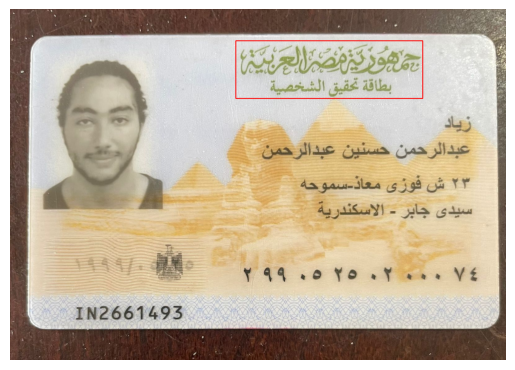

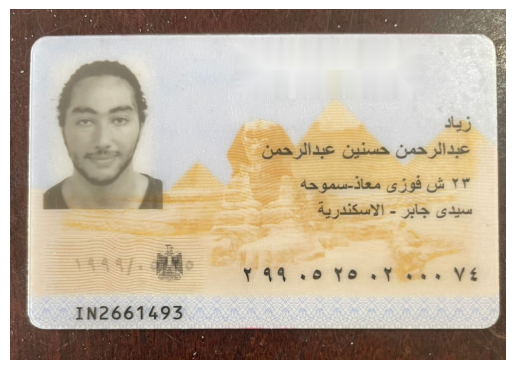

In [36]:
Process_image('/content/test_img.jpg','/content')